In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

np.random.seed(1) # If we call the seed function using value 1 multiple times, the computer displays the same random numbers.

df = pd.read_csv('/content/FaceBook_Stock.csv')

In [53]:
df.head()

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    251 non-null    object
 1   Price   251 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


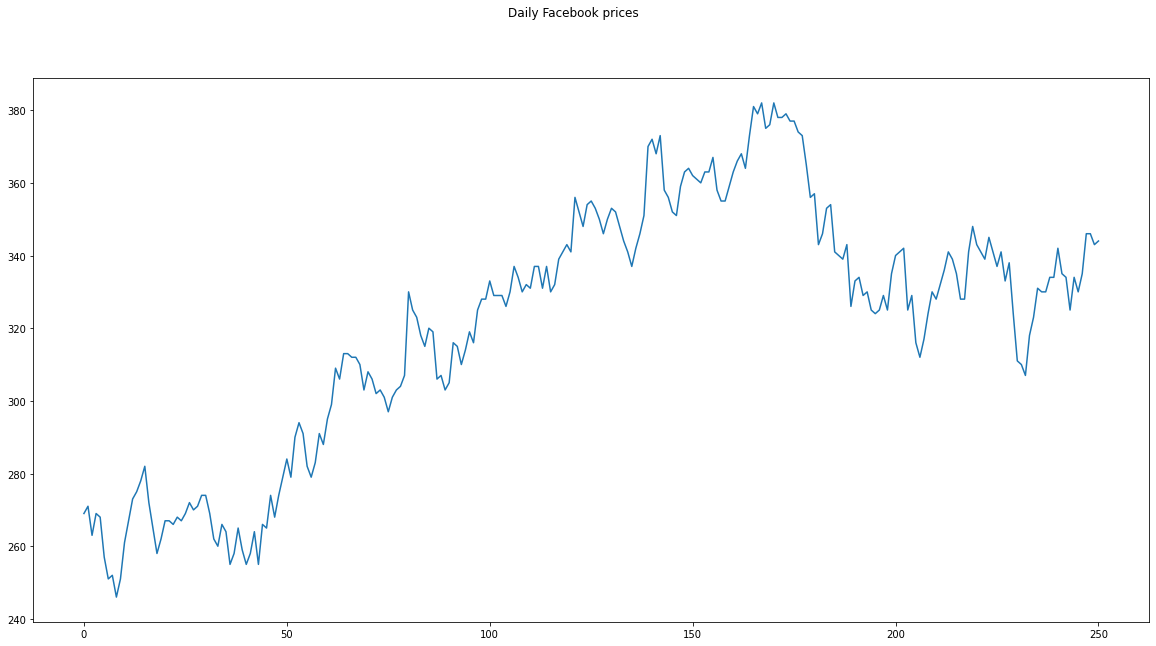

In [55]:
# Plot the data to visualize the stock price

plt.figure(figsize=(20,10)).suptitle("Daily Facebook prices")
plt.plot(df['Price'])
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
priced = sc.fit_transform(df[['Price']].values)

total_size = len(df['Price'])

#test DataSet size
test_size=50

train_size = total_size - test_size
print(train_size,test_size)



trained = priced[0:train_size,:]
tested = priced[train_size:,:]


print(trained.shape,tested.shape)

201 50
(201, 1) (50, 1)


#DataSet for RNN

In [57]:
#Prepare RNN Dataset. 
#Each data point (X) is linked to the previous data points of size=lookback
#The predicted value (Y) is the next point

def RNN(data,lookback=1):

  xdata,ydata = [],[]
  for i in range(len(data) - lookback-1):
    a = data[i:(i+lookback),0] #All points from this point, looking backwards upto lookback
    xdata.append(a)
    # The next point
    ydata.append(data[i+lookback,0])
  return np.array(xdata),np.array(ydata)

  #lookback for 25 previous days 
lookback=25 

  #create x and y training 
xtrain,ytrain = RNN(priced,lookback)

  #reshape for use with RNN
xtrain = np.reshape(xtrain,
                  (xtrain.shape[0],1,xtrain.shape[1]))


print("Shapes of X,Y :",xtrain.shape,ytrain.shape)

Shapes of X,Y : (225, 1, 25) (225,)


#Build the RNN Model 

In [58]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
import tensorflow as tf

tf.random.set_seed(3)

#Create a keras model 
model = Sequential()
model.add(SimpleRNN(32,input_shape=(1,lookback)))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])

model.summary()

model.fit(xtrain,ytrain,epochs=5,batch_size=1,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1856      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
225/225 [==============================] - 1s 2ms/step - loss: 0.1771 - mse: 0.1771
Epoch 2/5
225/225 [==============================] - 0s 2ms/step - loss: 0.0775 - mse: 0.0775
Epoch 3/5
225/225 [==============================] - 0s 2ms/step - loss: 0.0565 - mse: 0.0565
Epoch 4/5
225/225 [==============================] - 0s 2ms/step - loss: 0.0462 - mse: 0.0462
Epoch 5/5
225/225 [==============================] - 0s 2ms/step - loss:

#Test model

In [59]:
xtrain,ytrain = RNN(priced,lookback)

print(xtrain.shape,ytrain.shape)

xtrain = np.reshape(xtrain,
                  (xtrain.shape[0],1,xtrain.shape[1]))

model.evaluate(xtrain,ytrain,verbose=1)

predict_test = model.predict(xtrain)

predict_test = sc.inverse_transform(predict_test)

(225, 25) (225,)
8/8 [==============================] - 0s 2ms/step


#Visualize the Results 

In [60]:
tested_value = df[['Price']].loc[total_size-len(predict_test):]
tested_value.reset_index(drop=True,inplace=True)

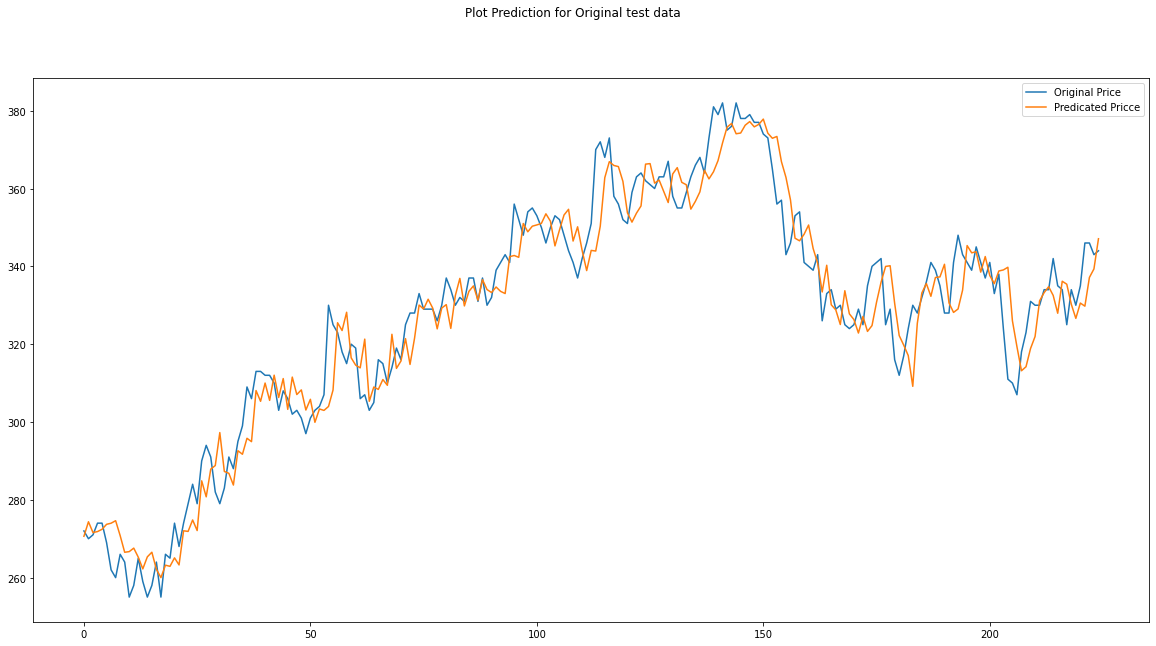

In [62]:
plt.figure(figsize=(20,10)).suptitle("Plot Prediction for Original test data")
plt.plot(tested_value,label='Original Price')
plt.plot(predict_test , label='Predicated Pricce')
plt.legend()
plt.show()

#Predictions

In [64]:
previous_prices = np.array([325,335,340,341,342,
                            325,329,316,312,317,
                            324,330,328,332,336,
                            341,339,335,328,328,
                            341,348,343,341,339])

#Scale
stuff = sc.transform(previous_prices.reshape(-1,1))
#Reshape
model_imput = np.reshape(stuff,
                         (stuff.shape[1],1,stuff.shape[0]))

#predictions 
predication = model.predict(model_imput)

#Scale back 
norm_prediction = sc.inverse_transform(predication)

print("The predicted Stock price is :", norm_prediction[0][0])

1/1 [==============================] - 0s 36ms/step
The predicted Stock price is : 338.51404
